## Libraries

In [131]:
import os, warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.utils import resample
from tqdm.notebook import tqdm
OMP_NUM_THREADS=1

## Loading data

- The data comes from [investing.com](https://www.investing.com/currencies/usd-ngn-historical-data)

In [49]:
usd_ngn = pd.read_csv('usd_ngn.csv')

In [50]:
usd_ngn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2870 non-null   object
 1   Price     2870 non-null   object
 2   Open      2870 non-null   object
 3   High      2870 non-null   object
 4   Low       2870 non-null   object
 5   Vol.      652 non-null    object
 6   Change %  2870 non-null   object
dtypes: object(7)
memory usage: 157.1+ KB


## Basic EDA

In [51]:
usd_ngn.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2024,"1,538.570","1,549.000","1,552.500","1,538.570",NaN,0.00%
1,12/29/2024,"1,538.570","1,549.000","1,549.000","1,538.570",NaN,-0.03%
2,12/27/2024,"1,539.000","1,538.570","1,559.500","1,532.285",NaN,0.09%
3,12/26/2024,"1,537.570","1,538.570","1,538.570","1,538.570",NaN,0.12%
4,12/25/2024,"1,535.720","1,535.720","1,535.720","1,535.720",NaN,-0.15%


In [52]:
# types of variables
usd_ngn.Date = pd.to_datetime(usd_ngn.Date)
usd_ngn.Price = pd.to_numeric(usd_ngn.Price.str.replace(',', ''), errors='coerce')
usd_ngn.Open = pd.to_numeric(usd_ngn.Open.str.replace(',', ''), errors='coerce')
usd_ngn.High = pd.to_numeric(usd_ngn.High.str.replace(',', ''), errors='coerce')
usd_ngn.Low = pd.to_numeric(usd_ngn.Low.str.replace(',', ''), errors='coerce')
usd_ngn["Change %"] = pd.to_numeric(usd_ngn["Change %"].str.replace('%', ''), errors='coerce')

In [53]:
usd_ngn.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-12-30,1538.57,1549.00,1552.50,1538.570,NaN,0.00
1,2024-12-29,1538.57,1549.00,1549.00,1538.570,NaN,-0.03
2,2024-12-27,1539.00,1538.57,1559.50,1532.285,NaN,0.09
3,2024-12-26,1537.57,1538.57,1538.57,1538.570,NaN,0.12
4,2024-12-25,1535.72,1535.72,1535.72,1535.720,NaN,-0.15


<Axes: title={'center': 'USD/NGN Exchange Rate'}, xlabel='Date'>

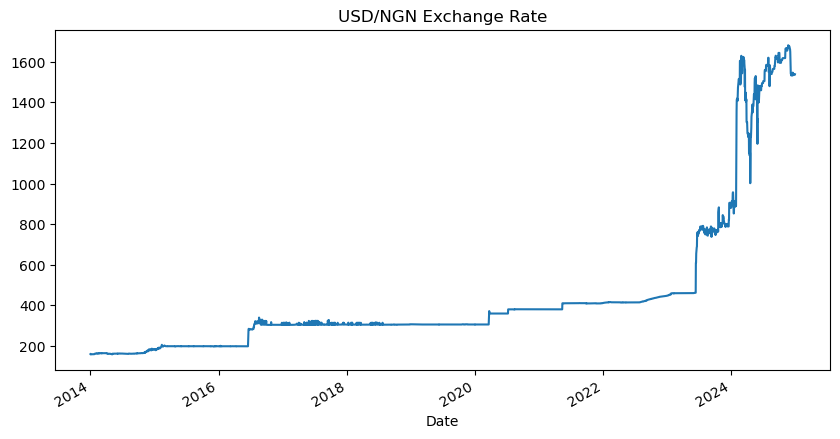

In [54]:
usd_ngn.sort_values('Date').set_index('Date').Price.plot(kind='line', title='USD/NGN Exchange Rate', figsize=(10, 5))

<Axes: title={'center': 'USD/NGN Exchange Rate'}, xlabel='Date'>

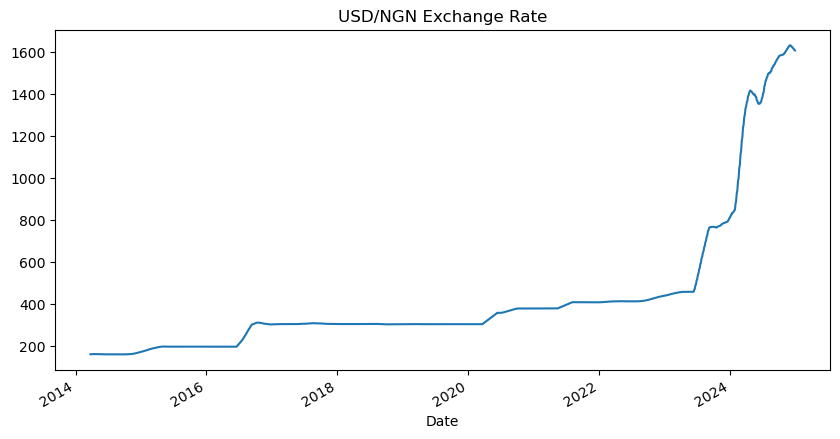

In [55]:
n_days = 60
usd_ngn.sort_values("Date").set_index("Date")['Price'].rolling(window=n_days).mean().plot(kind='line', title='USD/NGN Exchange Rate', figsize=(10, 5))

In [121]:
n_days = 85

In [116]:
usd_ngn.head(n_days).describe()

,Date,Price,Open,High,Low,Change %
count,70,70.000000,70.000000,70.000000,70.000000,70.000000
mean,2024-11-12 06:30:51.428571392,1611.084000,1629.251429,1651.686929,1605.014214,-0.050714
min,2024-09-25 00:00:00,1532.270000,1533.270000,1535.720000,1485.000000,-3.310000
25%,2024-10-18 18:00:00,1558.812500,1599.810000,1637.773750,1541.427500,-0.067500
50%,2024-11-12 12:00:00,1618.260000,1643.260000,1671.457500,1621.250000,0.000000
75%,2024-12-05 18:00:00,1658.507500,1668.970000,1690.156250,1639.545000,0.115000
max,2024-12-30 00:00:00,1681.390000,1693.360000,1717.500000,1679.125000,1.960000
std,NaN,49.224766,51.345749,56.306400,49.998423,0.724957


In [117]:
conf_level = 0.95

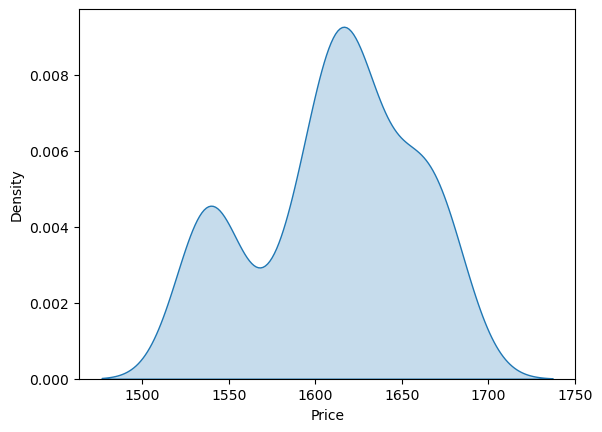

In [124]:
sns.kdeplot(usd_ngn['Price'].head(n_days), fill=True)
plt.show()

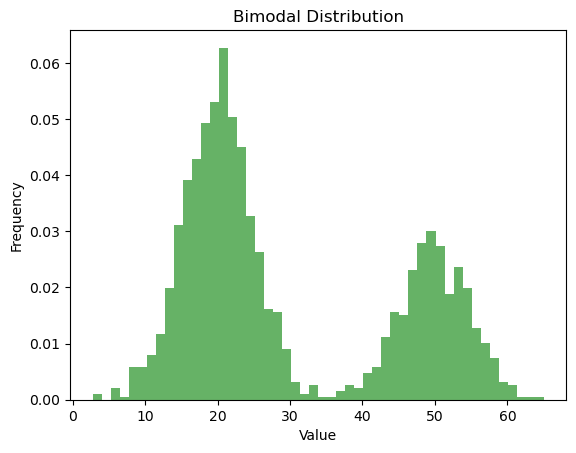

In [107]:
## Mixture of Two Normal Distributions
import numpy as np
import matplotlib.pyplot as plt

# Generate data from two different normal distributions
data1 = np.random.normal(loc=20, scale=5, size=1000)
data2 = np.random.normal(loc=50, scale=5, size=500)

# Combine the data to create a bimodal distribution
data = np.concatenate([data1, data2])

# Plot the histogram
plt.hist(data, bins=50, density=True, alpha=0.6, color='g')

# Plot the density
plt.title('Bimodal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Fitting a model to the prices data

c:\Users\origin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


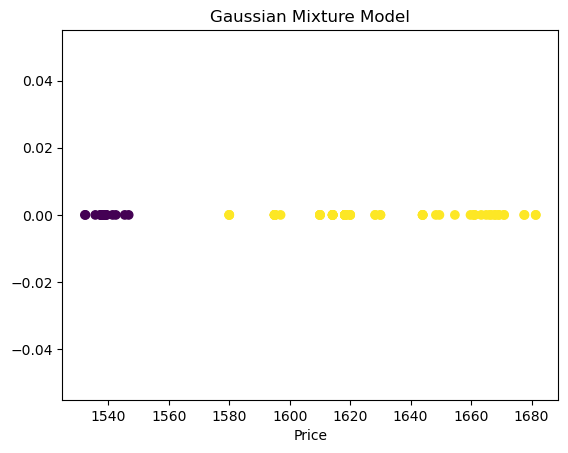

Means: [[1538.74875027]
 [1629.84587197]]
Covariances: [[[ 12.37288147]]

 [[804.78058446]]]


In [127]:
# Fit a Gaussian Mixture Model with 2 components
gmm = GaussianMixture(n_components=2)
gmm.fit(usd_ngn.head(n_days)[['Price']])

# Predict the component for each data point
labels = gmm.predict(usd_ngn.head(n_days)[['Price']])

# Plot the data points with different colors for each component
plt.scatter(usd_ngn.head(n_days)['Price'], np.zeros_like(usd_ngn['Price'].head(n_days)), c=labels, cmap='viridis')
plt.title('Gaussian Mixture Model')
plt.xlabel('Price')
plt.show()

# Print the means and covariances of the components
print('Means:', gmm.means_)
print('Covariances:', gmm.covariances_)

## Confidence interval for the mean

In [132]:
# Fit the initial GMM
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(usd_ngn[['Price']].head(n_days))

# Number of bootstrap samples
n_bootstrap = 100000

# Arrays to store bootstrap estimates
bootstrap_means = np.zeros((n_bootstrap, 2))
bootstrap_covariances = np.zeros((n_bootstrap, 2))

# Perform bootstrapping
for i in tqdm(range(n_bootstrap)):
    # Resample the data with replacement
    sample = resample(usd_ngn[['Price']].head(n_days), replace=True, n_samples=n_days)
    
    # Fit the GMM to the resampled data
    gmm_bootstrap = GaussianMixture(n_components=2, random_state=0)
    gmm_bootstrap.fit(sample)
    
    # Store the parameter estimates
    bootstrap_means[i, :] = gmm_bootstrap.means_.flatten()
    bootstrap_covariances[i, :] = gmm_bootstrap.covariances_.flatten()

# Calculate the 95% confidence intervals for the means
mean_conf_intervals = np.percentile(bootstrap_means, [2.5, 97.5], axis=0)
cov_conf_intervals = np.percentile(bootstrap_covariances, [2.5, 97.5], axis=0)

print('95% Confidence Intervals for Means:')
print(mean_conf_intervals)

print('95% Confidence Intervals for Covariances:')
print(cov_conf_intervals)

  0%|          | 0/100000 [00:00<?, ?it/s]

95% Confidence Intervals for Means:
[[1537.66049846 1537.32219387]
 [1668.68818524 1669.46722413]]
95% Confidence Intervals for Covariances:
[[   5.39968859    3.25991903]
 [1666.38516274 1605.40306011]]


In [133]:
# Generate synthetic samples for the next day's price
n_samples = 10000
synthetic_samples = np.zeros(n_samples)

for i in range(n_samples):
    # Randomly select a bootstrap estimate
    idx = np.random.randint(n_bootstrap)
    means = bootstrap_means[idx]
    covariances = bootstrap_covariances[idx]
    
    # Randomly select a component
    component = np.random.choice([0, 1])
    
    # Generate a synthetic sample from the selected component
    synthetic_samples[i] = np.random.normal(means[component], np.sqrt(covariances[component]/np.sqrt(n_days)))

# Calculate the 95% confidence interval for the next day's price
conf_interval = np.percentile(synthetic_samples, [2.5, 97.5])

print('95% Confidence Interval for the next day\'s price:')
print(conf_interval)

95% Confidence Interval for the next day's price:
[1536.66397548 1669.76332048]


## Monte Carlo Simulation

In [141]:

# Fit a Gaussian Mixture Model with 2 components
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(usd_ngn[['Price']].head(n_days))

# Monte Carlo simulation parameters
n_simulations = 1000000
intervals_bounds = [0, 1600, 1700, 1800]

# Initialize counters
n_times_price_falls_below_1600 = 0
n_times_price_falls_between_1600_1700 = 0
n_times_price_falls_between_1700_1800 = 0
n_times_price_falls_above_1800 = 0

# Perform Monte Carlo simulation
for i in tqdm(range(n_simulations)):
    # Generate synthetic samples for the next day's price using the GMM
    component = np.random.choice([0, 1], p=gmm.weights_)
    mean = gmm.means_[component][0]
    std_dev = np.sqrt(gmm.covariances_[component][0][0])/np.sqrt(n_days)
    simulated_price = np.random.normal(mean, std_dev, n_days)
    
    # Check which interval the minimum simulated price falls into
    min_price = simulated_price.min()
    if min_price < intervals_bounds[1]:
        n_times_price_falls_below_1600 += 1
    elif min_price < intervals_bounds[2]:
        n_times_price_falls_between_1600_1700 += 1
    elif min_price < intervals_bounds[3]:
        n_times_price_falls_between_1700_1800 += 1
    else:
        n_times_price_falls_above_1800 += 1

# Calculate probabilities
prob_below_1600 = n_times_price_falls_below_1600 / n_simulations
prob_between_1600_1700 = n_times_price_falls_between_1600_1700 / n_simulations
prob_between_1700_1800 = n_times_price_falls_between_1700_1800 / n_simulations
prob_above_1800 = n_times_price_falls_above_1800 / n_simulations

print(f'Probability of price falling below 1600: {prob_below_1600:.4f}')
print(f'Probability of price falling between 1600 and 1700: {prob_between_1600_1700:.4f}')
print(f'Probability of price falling between 1700 and 1800: {prob_between_1700_1800:.4f}')
print(f'Probability of price falling above 1800: {prob_above_1800:.4f}')

  0%|          | 0/1000000 [00:00<?, ?it/s]

Probability of price falling below 1600: 0.2099
Probability of price falling between 1600 and 1700: 0.7901
Probability of price falling between 1700 and 1800: 0.0000
Probability of price falling above 1800: 0.0000
